# Mownit lab4

### Import bibliotek

In [5]:
from math import exp, sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np


## Moja wersja funkcji

In [6]:
#f7, k=3, m=2, [-pi, 2pi]
def f(x):
    return exp(-3 * sin(2*x)) + 3 * cos(2*x)

In [7]:
def f_d(x):
    return -6 * sin(2*x) - 6*exp(-3*sin(2*x))*cos(2*x)

In [8]:
x_start = -pi
x_end = 2*pi

## Aproksymacja wielomianowa

In [9]:
def value(vec, x):
    result = 0
    for i in range(len(vec)):
        result += vec[i]*x**i
    return result

In [10]:
def get_approximation_factors(xs, degree):
    values = np.array(list(map(f, xs)))
    #print("values: ",values)
    n = len(xs)
    matrix = np.zeros((n, degree+1))
    for i in range(n):
        for j in range(degree+1):
            matrix[i][j] += xs[i]**j
    return np.linalg.inv(np.transpose(matrix).dot(matrix)).dot(np.transpose(matrix)).dot(values)

In [11]:
def even_node(i, n):
    return x_start + i * (x_end - x_start)/(n-1)

def build_nodes(points_number, nodes_method = even_node):
    x_points = [0] * points_number
    y_points = [0] * points_number
    for i in range(points_number):
        x_points[i] = nodes_method(i, points_number)
        y_points[i] = f(x_points[i])
    return x_points, y_points

In [12]:
#build_nodes(10)

In [13]:
def get_approx_values(n, degree, size = 100):
    xs, ys = build_nodes(n)
    coef = get_approximation_factors(xs, degree)
    xt, _ = build_nodes(size)
    yt = [0] * len(xt)
    for i in range(size):
        yt[i] = value(coef, xt[i])
    return xt, yt

In [14]:
def visualize(n, degree):
    xt, yt = get_approx_values(n, degree)
    plt.plot(xt,yt)
    xp,yp = build_nodes(100)
    plt.plot(xp,yp)
    #xs, ys = build_nodes(n)
    #plt.scatter(xs,ys, c = ["#000000"])

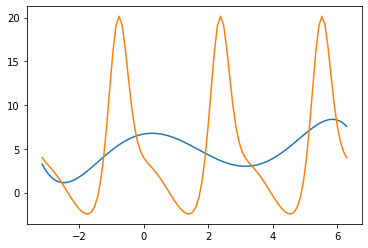

In [24]:
visualize(16, 5)

In [63]:
def diff(n, test_m, degree, node_m = even_node, aprox = get_approx_values):
    xs, ys = build_nodes(n,node_m)
    xt, yt = aprox(n, degree)
    xp, yp = build_nodes(100,even_node)
    return test_m([abs(yp[i]-yt[i]) for i in range(len(yp))])

In [62]:
print(diff(10,np.mean,15, even_node))
print(diff(15,np.mean,15, even_node))
print(diff(20,np.mean,15, even_node))

283.4505769816105
78.6020342149821
4.800133778177445


In [18]:
print(diff(10,max,15, even_node))
print(diff(15,max,15, even_node))
print(diff(20,max,15, even_node))
print(diff(30,max,15, even_node))

493.20407137833894
1169.7157531002847
61.41892612090654
12.019401896154392


In [19]:
print(diff(30,np.mean,15, even_node))
print(diff(30,np.mean,7, even_node))
print(diff(30,np.mean,5, even_node))
print(diff(30,np.mean,4, even_node))
print(diff(30,np.mean,3, even_node))

2.487395235818122
4.067694249782023
5.245863111975251
5.344455132602661
5.387695558469813


## Aproksymacja trygonometrzyczna

In [30]:
def get_trig_coeff(m, k, nodes):
    akl = []
    bkl = []
    n = len(nodes)
    for i in range(n):
        akl.append(f(nodes[i]*3/2) * np.cos(k*nodes[i]))
        bkl.append(f(nodes[i]*3/2) * np.sin(k*nodes[i]))
    return (sum(akl) / (n/2)), (sum(bkl) / (n/2))


def approximate_trig(x, nodes, m):
    a0 = get_trig_coeff(m, 0, nodes)[0]
    res = 0
    for k in range(1, m):
        ak, bk = get_trig_coeff(m, k, nodes)
        res += ak * np.cos(2/3 * k * x)
        res += bk * np.sin(2/3 * k * x)
    res += a0 / 2
    return res
def get_trig_points(n, degree, size = 100):
    xs, _ = build_nodes(n)
    xt, _ = build_nodes(size)
    yt = [0] * len(xt)
    for i in range(size):
        yt[i] = approximate_trig(xt[i],xs,degree)
    return xt, yt

In [32]:
#get_trig_points(3, 4)

In [34]:
def visualize2(n, degree):
    xt, yt = get_trig_points(n, degree)
    plt.plot(xt,yt)
    xp,yp = build_nodes(100)
    plt.plot(xp,yp)

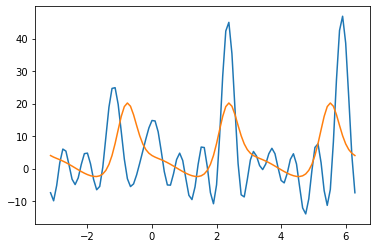

In [58]:
visualize2(13,15)

In [70]:
print(diff(30,np.mean,3, even_node, get_trig_points))
print(diff(30,np.mean,4, even_node, get_trig_points))
print(diff(30,np.mean,5, even_node, get_trig_points))
print(diff(30,np.mean,7, even_node, get_trig_points))
print(diff(30,np.mean,10, even_node, get_trig_points))
print(diff(30,np.mean,15, even_node, get_trig_points))

5.992260820695791
3.3651683129181644
3.407535976268741
2.254339376120931
1.933252042736988
2.428475071124266


In [74]:
print(diff(10,max,3, even_node, get_trig_points))
print(diff(10,max,4, even_node, get_trig_points))
print(diff(10,max,5, even_node, get_trig_points))
print(diff(10,max,7, even_node, get_trig_points))
print(diff(10,max,10, even_node, get_trig_points))
print(diff(10,max,15, even_node, get_trig_points))

19.748906274652764
19.46341477971032
19.367936239346072
21.091732145536813
23.03529183522417
21.584854071064917
